In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv("concrete_data.csv")
df = data.copy()

# Data Understanding

In [3]:
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# replacing column names to more identical formats
df_cols = []
for i in df.columns:
     df_cols.append(i.lower().replace(" ","_"))
df.columns=df_cols

In [5]:
df.shape

(1030, 9)

Checking NA variables

<AxesSubplot:>

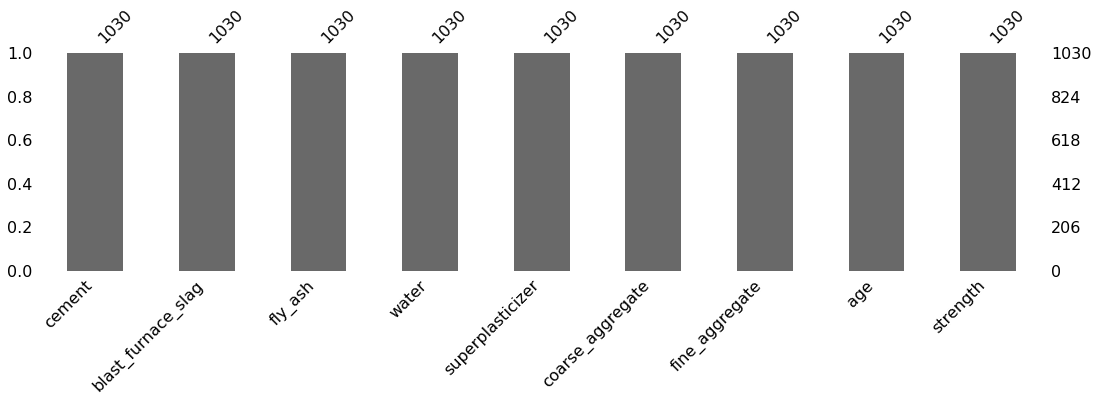

In [6]:
msno.bar(df,figsize=(18,4))

Chechimg duplicated rows

In [7]:
print("How many duplicated rows do we have:",df.duplicated().sum())

How many duplicated rows do we have: 25


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Upon description, a strange pattern occurred 3 of the 7 ingredients had a min number of 0 which means that there are some varieties in which some of the ingredients are missing. Based on this analogy 8 different types may be created 
Blast_furnace_slag|fly_ash|superplasticizer we will use indexes based on that
the combination of 000 means all three ingredients are upcent 
and 011 means only Blast_furnace_slag is missing etc.

In [10]:
print(df[(df["blast_furnace_slag"]==0)& (df["fly_ash"]==0)&(df["superplasticizer"]==0)].shape[0])

print(df[(df["blast_furnace_slag"]==0)& (df["fly_ash"]==0)&(df["superplasticizer"]!=0)].shape[0])
print(df[(df["blast_furnace_slag"]!=0)& (df["fly_ash"]==0)&(df["superplasticizer"]==0)].shape[0])
print(df[(df["blast_furnace_slag"]==0)& (df["fly_ash"]!=0)&(df["superplasticizer"]==0)].shape[0])

print(df[(df["blast_furnace_slag"]==0)& (df["fly_ash"]!=0)&(df["superplasticizer"]!=0)].shape[0])
print(df[(df["blast_furnace_slag"]!=0)& (df["fly_ash"]==0)&(df["superplasticizer"]!=0)].shape[0])
print(df[(df["blast_furnace_slag"]!=0)& (df["fly_ash"]!=0)&(df["superplasticizer"]==0)].shape[0])

print(df[(df["blast_furnace_slag"]!=0)& (df["fly_ash"]!=0)&(df["superplasticizer"]!=0)].shape[0])

208
23
164
6
233
146
0
225


In [11]:
def label_cement (row):
    if row['blast_furnace_slag'] + row["fly_ash"]+row["superplasticizer"] == 0 :
          return 'type_000'
    if row['blast_furnace_slag'] + row["fly_ash"]  == 0 :
          return 'type_001'
    if row["fly_ash"]+row["superplasticizer"] == 0 :
          return 'type_100'
    if row['blast_furnace_slag']+row["superplasticizer"] == 0 :
          return 'type_010'
    if row['blast_furnace_slag']  == 0:
          return 'type_011'
    if row['fly_ash'] == 0:
          return 'type_101'
    if row['superplasticizer'] == 0:
          return 'type_110'
    return 'type_111'

In [12]:
df["type"]=df.apply(lambda row: label_cement(row), axis=1)

In [13]:
df.type.value_counts()

type_011    233
type_111    225
type_000    208
type_100    164
type_101    146
type_001     23
type_010      6
Name: type, dtype: int64

In [14]:
type_dict = {1: 'type_001',
              2: 'type_100',
              3: 'type_000',
              4: 'type_101',
              5: 'type_011',
              6: 'type_111',
              7: 'type_010',}

strength_mean_serie = df.groupby('type')['strength'].mean()
df['mean_strength'] = df['type'].map(strength_mean_serie)

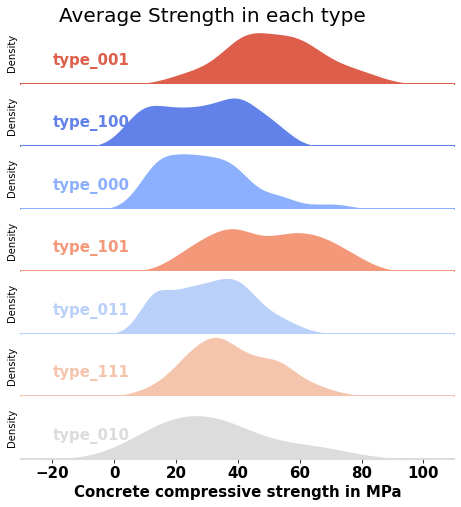

In [15]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=7)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(df, row = "type", hue='mean_strength', aspect=7, height=1, palette=pal)

# then we add the densities kdeplots  
g.map(sns.kdeplot, 'strength',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'strength', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-20, 0.009, type_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.001)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Concrete compressive strength in MPa', fontweight='bold', fontsize=15)
g.fig.suptitle('Average Strength in each type',
               ha='center',
               fontsize=20,
               fontweight=20)

plt.show()

In [16]:
df.drop("mean_strength",axis=1,inplace=True)

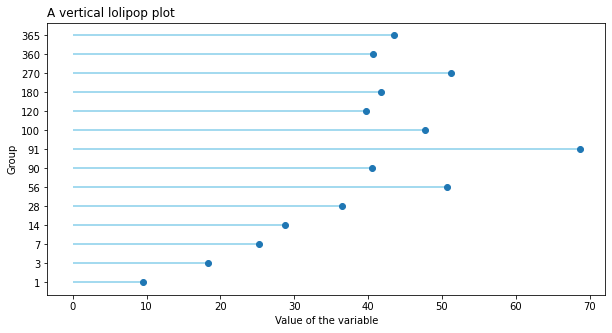

In [17]:
df_loli = pd.DataFrame(df.groupby("age")["strength"].mean()).reset_index()
# Reorder it based on the values
ordered_df = df_loli.sort_values(by='age')
my_range=range(1,len(df_loli.index)+1)

plt.figure(figsize=(10,5))
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['strength'], color='skyblue')
plt.plot(ordered_df['strength'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['age'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# Show the plot
plt.show()

# Data Preperation

In [18]:
df_m = df.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["type"] = encoder.fit_transform(df["type"])

In [20]:
X = df.drop(["strength"],axis=1)
y = df.strength

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_cols = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=X_cols)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=101)

# Moddeling

In [23]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# y_pred_train = model.fit(X_train,y_train).predict(X_train)
# y_pred_test = model.predict(X_test)

In [24]:
# #To retrieve the intercept:
# print(model.intercept_)
# #For retrieving the slope:
# print(model.coef_)

5.456539877319777
[ 47.55019333  26.76654055  13.25166733 -22.59425791   5.13254517
   3.27886368   3.22225842  43.01910482   5.48582954]


In [25]:
# from xgboost import XGBRFRegressor
# model = XGBRFRegressor()
# y_pred_train = model.fit(X_train,y_train).predict(X_train)
# y_pred_test = model.predict(X_test)

In [38]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
y_pred_train = model.fit(X_train,y_train).predict(X_train)
y_pred_test = model.predict(X_test)

The performance of LightGBM was better

# Evaluating

In [39]:
from sklearn.metrics import mean_absolute_error,r2_score ,mean_absolute_percentage_error,mean_squared_error

In [40]:
print("\033[1mEvaluation of training performance:")
print("\033[0mMAE:",round(mean_absolute_error(y_train,y_pred_train),2))
print("MAPE:",round(mean_absolute_percentage_error(y_train,y_pred_train)*100,2),"%")
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
print("R**2:",round(r2_score(y_train,y_pred_train),2))

Evaluation of training performance:
MAE: 1.46
MAPE: 5.18 %
RMSE: 2.26
R**2: 0.98


In [41]:
print("\033[1mEvaluation of training performance:")
print("\033[0mMAE:",round(mean_absolute_error(y_test,y_pred_test),2))
print("MAPE:",round(mean_absolute_percentage_error(y_test,y_pred_test)*100,2),"%")
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred_test)),2))
print("R**2:",round(r2_score(y_test,y_pred_test),2))

Evaluation of training performance:
MAE: 2.88
MAPE: 9.39 %
RMSE: 4.04
R**2: 0.94


# MVP Deployment

In [42]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength,type
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378,3.452736
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815,2.125777
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000,0.000000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000,3.000000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000,4.000000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000,5.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000,6.000000


In [43]:
df.head(3)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength,type
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,4


In [56]:
demo ={"cement":500,
        "blast_furnace_slag":250,
        "fly_ash":62 ,
        "water":240 ,
        "superplasticizer":5 ,
        "coarse_aggregate":1100 ,
        "fine_aggregate":487 ,
        "age": 124,
        "type":3 
    }
demo_df = pd.DataFrame(pd.Series(demo)).T
demo_df["index"] = "sample"
demo_df.set_index("index",inplace=True)

demo_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,type
index,,,,,,,,,
sample,500,250,62,240,5,1100,487,124,3


In [57]:
demo_df_scaled = scaler.transform(demo_df)
demo_df_scaled = pd.DataFrame(demo_df_scaled,columns=X_cols,index=["sample"])
demo_df_scaled

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,type
sample,0.908676,0.695604,0.309845,0.944089,0.15528,0.869186,-0.26844,0.337912,0.5


In [58]:
demo_s_t = demo_df_scaled.T.reset_index()
demo_s_t.columns =  ["column","sample"]
demo_s_t.sort_values("sample",ascending=False,inplace=True)
demo_s_t

,column,sample
3,water,0.944089
0,cement,0.908676
5,coarse_aggregate,0.869186
1,blast_furnace_slag,0.695604
8,type,0.500000
7,age,0.337912
2,fly_ash,0.309845
4,superplasticizer,0.155280
6,fine_aggregate,-0.268440


In [59]:
demo_df["pred"]  = model.predict(demo_df_scaled)
demo_df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,type,pred
index,,,,,,,,,,
sample,500,250,62,240,5,1100,487,124,3,46.042056


In [54]:
demo_t = demo_df.T.reset_index()
demo_t.columns = ["column","sample"]
demo_t

,column,sample
0,cement,450.000000
1,blast_furnace_slag,80.000000
2,fly_ash,62.000000
3,water,240.000000
4,superplasticizer,5.000000
5,coarse_aggregate,1100.000000
6,fine_aggregate,487.000000
7,age,124.000000
8,type,3.000000
9,pred,41.789107


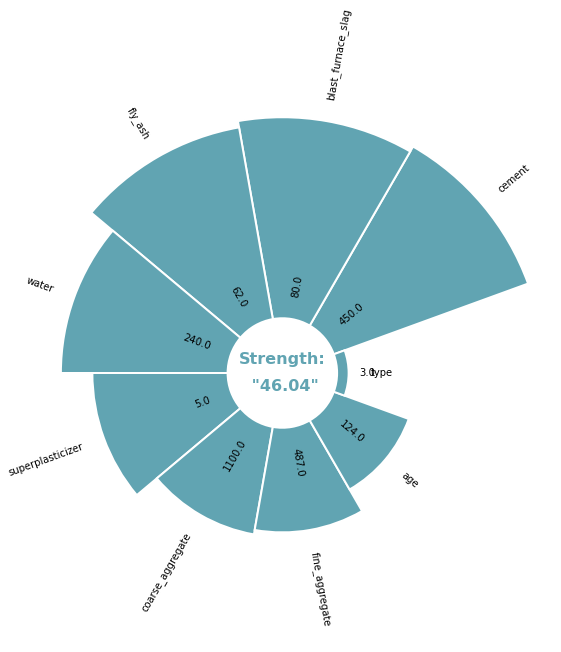

In [60]:
# set figure size
plt.figure(figsize=(10,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 4
lowerLimit = 0.25

# Compute max and min in the dataset
max = demo_s_t['sample'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * demo_s_t['sample'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(demo_s_t.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(demo_s_t.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#61a4b2",
)

# little space between the bar and the label
labelPadding = 0.1

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, demo_t["column"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, demo_t["sample"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit +  labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor")
    
ax.text(
    x=0.5, y=0.5, s=f'Strength:\n\n "{round(demo_df.pred["sample"],2)}"',
    color="#61a4b2", va="center", ha="center", ma="center",
    fontsize=16, fontweight="bold", linespacing=0.87, transform=ax.transAxes
)

plt.show()